## File EDA.py which include a lot of functions for this programe, user need to run file EDA.py firsr

In [1]:
%run EDA.py

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Import neccessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## READ FILE EXCEL

## Users need to replace the name of the excel file in the quote to read the excel file.

## df is a dataframe which contain all data of excel file

In [4]:
df = pd.read_excel('22624 KCH FINAL DOWNLOAD DiFG.xlsx')
df

,Create a code for each comment (FF_001),Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
0,NaN,Ensure public library provides the same servic...
1,NaN,Carbon footprint. Scamming political climate. ...
2,NaN,I would like the team to consider missing out ...
3,NaN,No
4,NaN,NaN
...,...,...
415,NaN,NaN
416,NaN,Don’t add kirklees to any building.
417,NaN,Don’t design them anything like the disgracefu...
418,NaN,Don’t plaster the horrible name kirklees on an...


## To check how many responses from surveyers, user can replace the name of the column

## Function plot_form_responses_1 is called from the file EDA.py

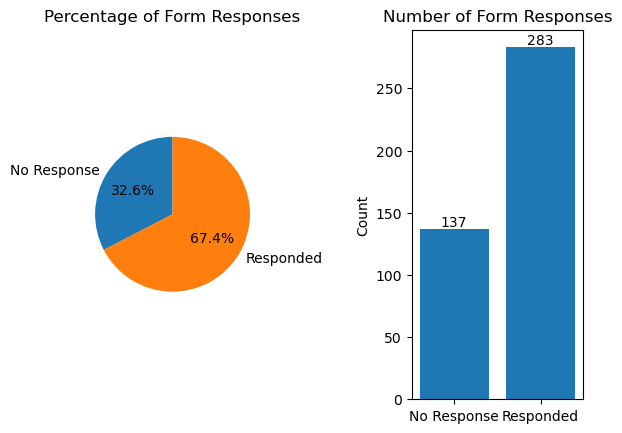

In [5]:
# Assuming you have a DataFrame called `df` and the column name is 'Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'
plot_form_responses_1(df, 'Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?')


## Replace the name of the columm "Create a code for each comment (FF_001)" into "Comment_ID"

In [6]:
df.rename(columns={"Create a code for each comment (FF_001)": "Comment_ID"}, inplace=True)


## Replace the name of the columm "Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?" into "Recommendations"

In [7]:
df.rename(columns={"Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?": "Recommendations"}, inplace=True)


## Generate the code values with format FF001


In [8]:
df['Comment_ID'] = df.index.map(lambda x: f"FF{x+1:03d}")

## We need to remove null values which are empty cells and responses "No"

In [9]:
df_1 = df.dropna(subset=['Recommendations'])

# Define the list of responses to remove
no_responses = ['NO', 'NO.','No','No.','no', 'no.']

# Remove rows with matching responses
df_1 = df_1[~df_1['Recommendations'].isin(no_responses)]


In [10]:
# Print the updated dataframe
df_1

,Comment_ID,Recommendations
0,FF001,Ensure public library provides the same servic...
1,FF002,Carbon footprint. Scamming political climate. ...
2,FF003,I would like the team to consider missing out ...
5,FF006,Covered outdoor space for concerts and getting...
6,FF007,You really need to find a way to address the c...
...,...,...
414,FF415,Remove the Green space Huddersfield has Three ...
416,FF417,Don’t add kirklees to any building.
417,FF418,Don’t design them anything like the disgracefu...
418,FF419,Don’t plaster the horrible name kirklees on an...


## As we cannot see all comments of from dataframe, so we need extract the values of the column into a list to see them easily


In [11]:
recommendations_list = df_1["Recommendations"].tolist()


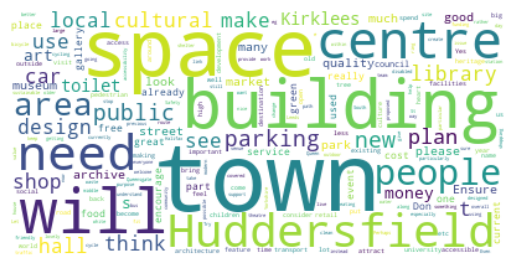

In [12]:
generate_wordcloud(df_1, 'Recommendations')


##  Line 39 lists all the keywords from the dataset in ascending order. Specify a few keywords from here 

In [13]:
create_word_frequency_table(recommendations_list)

Word Frequency Table:
town: 108
centre: 51
huddersfield: 48
buildings: 48
people: 46
space: 43
would: 38
need: 36
like: 33
spaces: 32
public: 31
parking: 31
new: 30
library: 24
see: 24
local: 23
area: 22
think: 21
plans: 21
make: 21
use: 20
cultural: 20
kirklees: 20
hall: 20
building: 19
toilets: 19
money: 18
also: 18
design: 18
good: 17
could: 17
please: 17
quality: 17
areas: 16
get: 16
park: 15
much: 15
many: 15
market: 15
ensure: 14
car: 14
already: 14
shops: 14
museum: 13
green: 13
archive: 13
art: 13
great: 13
encourage: 13
street: 13
food: 12
really: 12
part: 12
current: 12
needs: 12
free: 11
used: 11
gallery: 11
council: 11
events: 11
look: 11
university: 11
heritage: 11
service: 10
place: 10
yes: 10
existing: 10
cost: 10
visit: 10
years: 10
access: 10
accessible: 10
heart: 10
retail: 10
features: 10
old: 10
architecture: 10
around: 10
consider: 9
attract: 9
outside: 9
less: 9
well: 9
big: 9
back: 9
open: 9
transport: 9
facilities: 9
put: 9
cars: 9
destination: 8
feel: 8
bring: 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
def create_word_frequency_table(recommendations_list):
    nltk.download('stopwords')
    nltk.download('punkt')

    stop_words = set(stopwords.words('english'))
    word_freq = FreqDist()
    
    for text in recommendations_list:
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        word_freq.update(tokens)

    print("Word Frequency Table:")
    for word, freq in word_freq.most_common():
        print(f"{word}: {freq}")

    unique_words = [word for word, _ in word_freq.most_common()]
    print("\nUnique Words:")
    print(unique_words)

    return unique_words


## Use function split_sentences from file EDA.py to split recommendations having more than one sentence

## Comment_ID of recommendations splitted will be added 2 numbers after the old ones

## Comment_ID of recommendations having one sentences will be add 00 after the old ones

In [15]:
new_df = split_sentences(df_1, 'Recommendations')

# Print the new dataframe
new_df


,Comment_ID,Recommendations
0,FF00101,Ensure public library provides the same service.
1,FF00102,The library service is not just about lending ...
2,FF00201,Carbon footprint.
3,FF00202,Scamming political climate.
4,FF00203,Dismissal of deep any affections for what is g...
...,...,...
542,FF26800,Remove the Green space Huddersfield has Three ...
543,FF26900,Don’t add kirklees to any building.
544,FF27000,Don’t design them anything like the disgracefu...
545,FF27100,Don’t plaster the horrible name kirklees on an...


## You can replace 'financing|investment|money|capital|monetary|fund|cost|Wider Kirklees' as topic you want

In [16]:
new_df_financing = new_df[new_df['Recommendations'].str.contains('financing|investment|money|capital|monetary|fund|cost|Wider Kirklees', case=False)]
#new_df_financing


## You can remove # before recommendations_financing to see all recommendations directly

In [17]:
recommendations_financing = new_df_financing["Recommendations"].tolist()
#recommendations_financing

## You can change the lable "financing's commentors" for pie chart and bar chart 

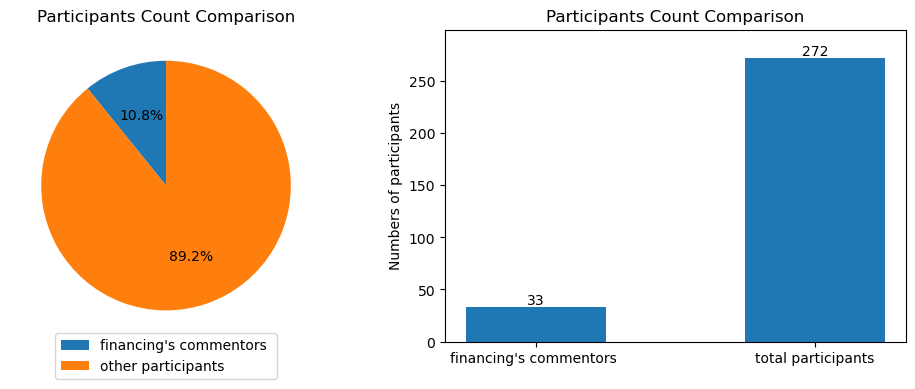

In [18]:
plot_observation_count(new_df_financing, df_1, "financing's commentors ")


## You can have similar changes with other topic

In [19]:
new_df_building_design = new_df[new_df['Recommendations'].str.contains('layout|design|building|architectural|structure|floor|integration|schemes|water|environmental|effect|sustainability|sight|lines', case=False)]
#new_df_building_design


In [20]:
recommendations_building_design = new_df_building_design["Recommendations"].tolist()
#recommendations_building_design

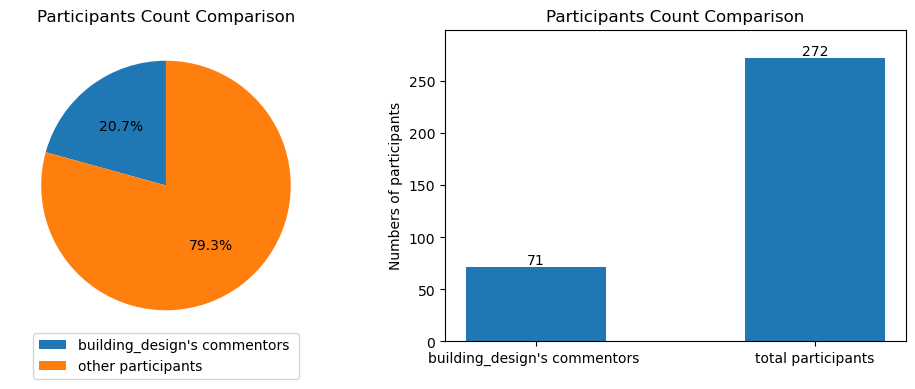

In [21]:
plot_observation_count(new_df_building_design, df_1, "building_design's commentors ")


In [22]:
new_df_heritage_culture = new_df[new_df['Recommendations'].str.contains('Heritage|Culture|tradition|legacy|historical|importance|ancestral|customs|modern|stone|community|space|art|music|Yorkshire', case=False)]
#new_df_heritage_culture


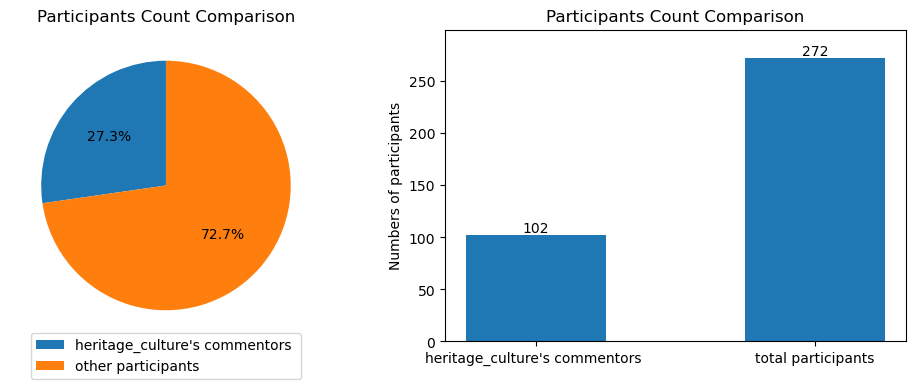

In [23]:
plot_observation_count(new_df_heritage_culture, df_1, "heritage_culture's commentors ")


In [24]:
new_df_demolition = new_df[new_df['Recommendations'].str.contains('demolition|remove|destruction|Dismantling|loss|knock|down', case=False)]
#new_df_demolition


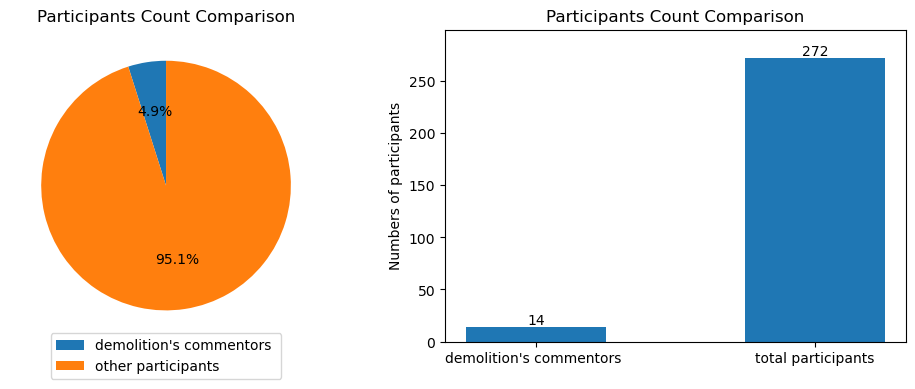

In [25]:
plot_observation_count(new_df_demolition, df_1, "demolition's commentors ")


In [62]:
# Create a new dataframe with rows containing the word "library"
new_df_library = new_df[new_df['Recommendations'].str.contains("library|book|reading|information|Knowledge", case=False)]
#new_df_library


In [63]:
recommendations_library = new_df_library["Recommendations"].tolist()


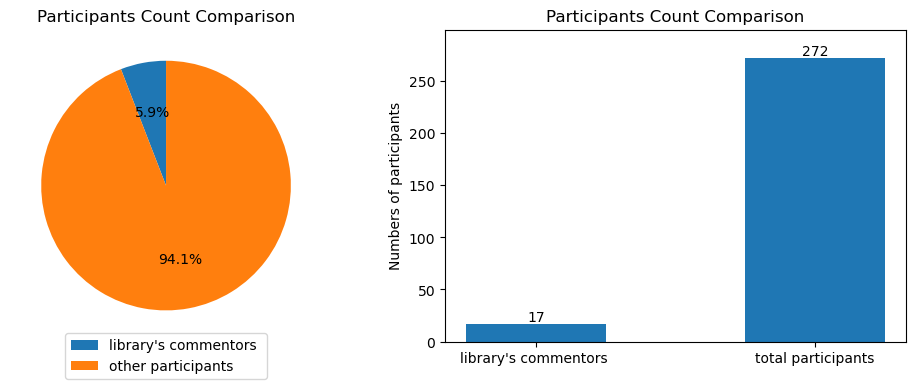

In [64]:
plot_observation_count(new_df_library, df_1, "library's commentors ")


In [65]:
new_df_food_hall = new_df[new_df['Recommendations'].str.contains('food|restaurant|Market|dining|eat|drink|Gastronomy', case=False)]
#new_df_food_hall


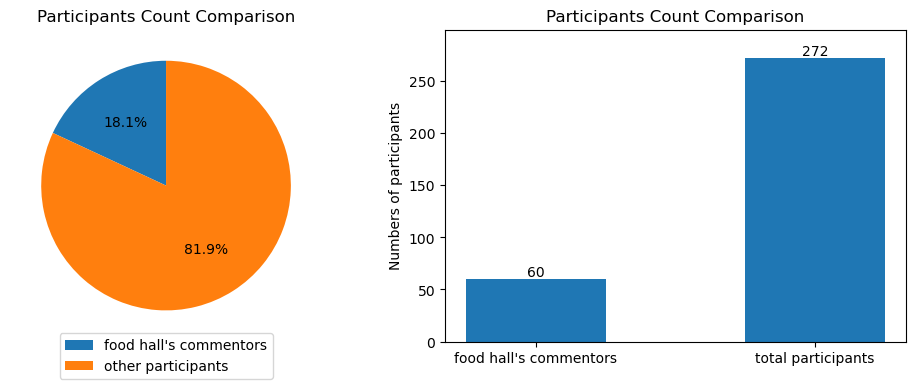

In [66]:
plot_observation_count(new_df_food_hall, df_1, "food hall's commentors")


In [67]:
new_df_museum_art = new_df[new_df['Recommendations'].str.contains('museum|Gallery|Exhibition|Cultural|Art|Historical|Collection', case=False)]
#new_df_museum_art


In [68]:
recommendations_museum_art = new_df_museum_art["Recommendations"].tolist()
#recommendations_museum_art


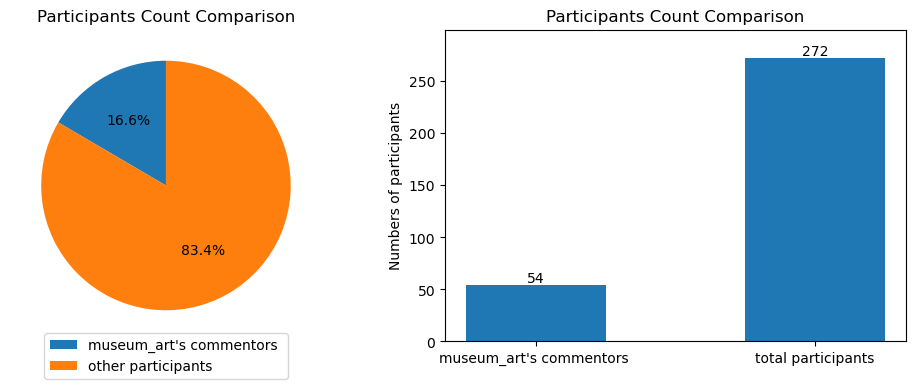

In [69]:
plot_observation_count(new_df_museum_art, df_1, "museum_art's commentors ")


In [70]:
new_df_museum = new_df[new_df['Recommendations'].str.contains('museum|history', case=False)]
#new_df_museum


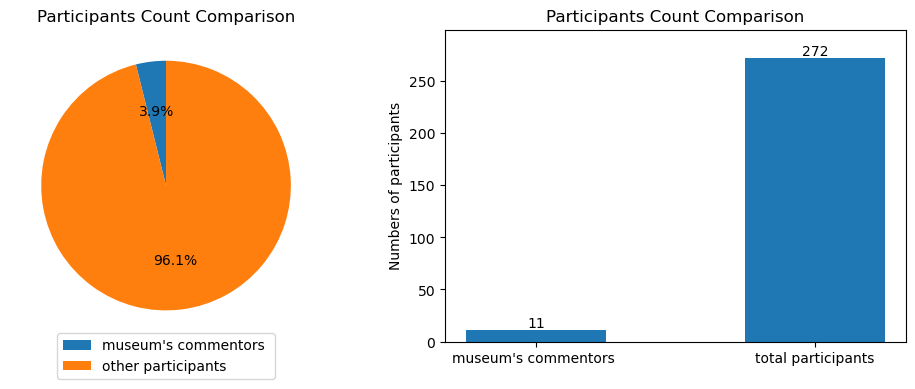

In [71]:
plot_observation_count(new_df_museum, df_1, "museum's commentors ")


In [72]:
new_df_art_gallery = new_df[new_df['Recommendations'].str.contains('art|gallery', case=False)]
#new_df_art_gallery


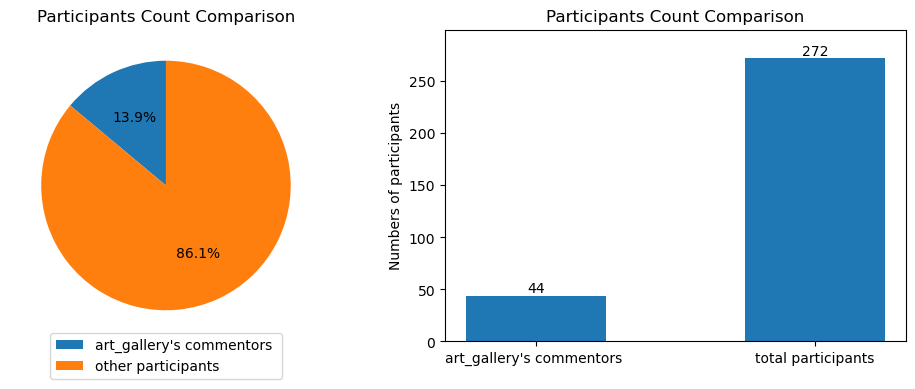

In [73]:
plot_observation_count(new_df_art_gallery, df_1, "art_gallery's commentors ")


In [74]:
new_df_multi_person = new_df[new_df['Recommendations'].str.contains('Event|Gathering|Social|venue|Meeting|Assembly', case=False)]
#new_df_multi_person


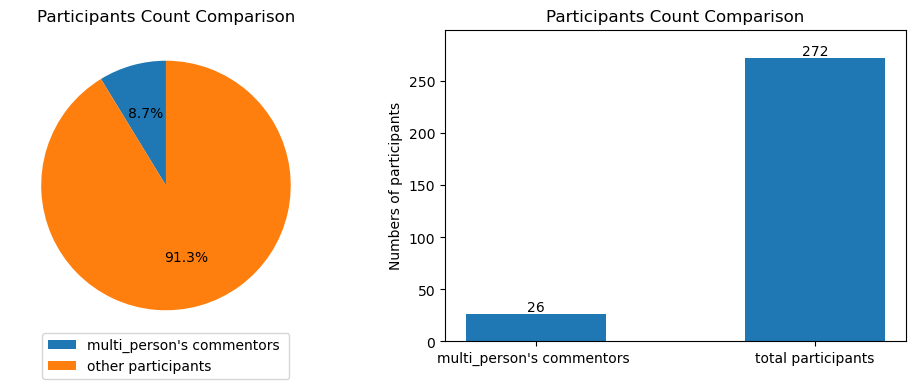

In [75]:
plot_observation_count(new_df_multi_person, df_1, "multi_person's commentors ")


In [76]:
new_df_parking = new_df[new_df['Recommendations'].str.contains('parking|car|vehicle|storage', case=False)]
#new_df_parking


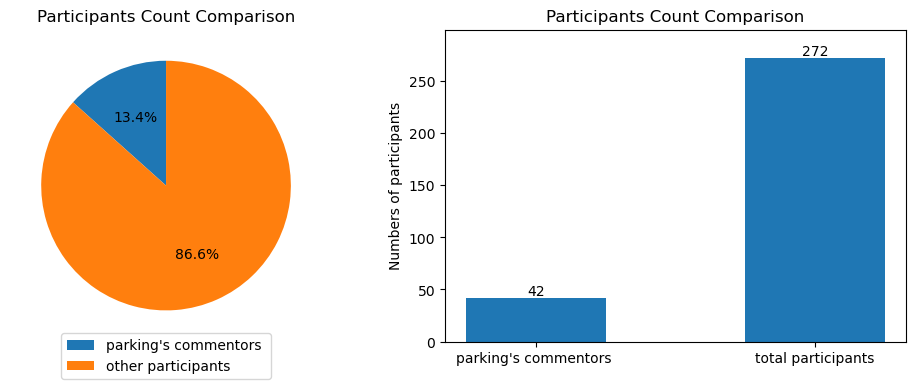

In [77]:
plot_observation_count(new_df_parking, df_1, "parking's commentors ")


In [78]:
new_df_outdoor  = new_df[new_df['Recommendations'].str.contains('outdoor|air|open', case=False)]
#new_df_outdoor


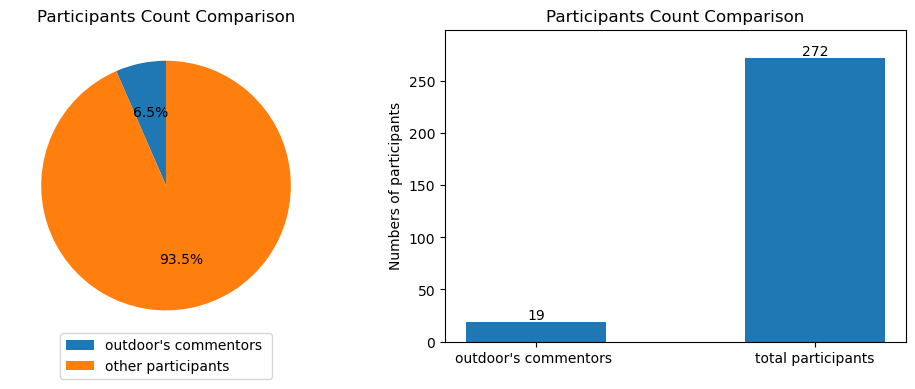

In [79]:
plot_observation_count(new_df_outdoor, df_1, "outdoor's commentors ")


In [80]:
new_df_safety_maintenance = new_df[new_df['Recommendations'].str.contains('Security|safety|unsafety|maintenance|Protection|Care|Upkeep', case=False)]
#new_df_safety_maintenance


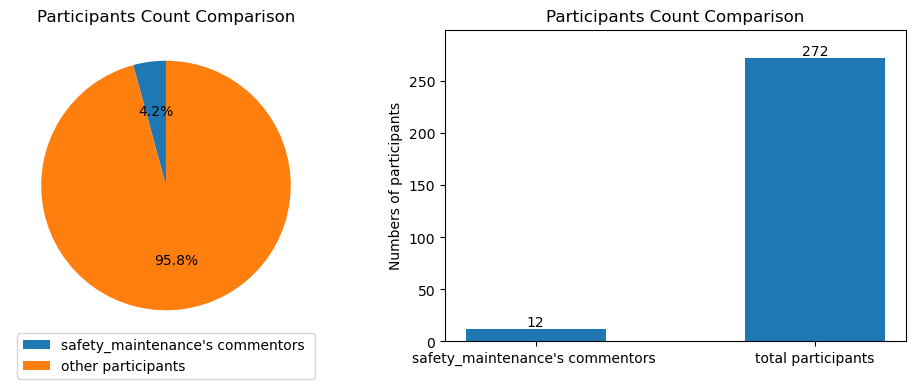

In [81]:
plot_observation_count(new_df_safety_maintenance, df_1, "safety_maintenance's commentors ")


In [82]:
new_df_facilities_accessibility = new_df[new_df['Recommendations'].str.contains('facilities|public|accessibility', case=False)]
#new_df_facilities_accessibility


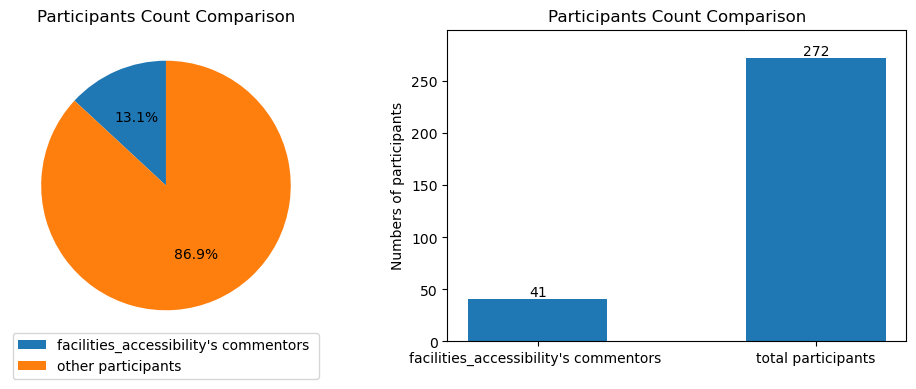

In [83]:
plot_observation_count(new_df_facilities_accessibility, df_1, "facilities_accessibility's commentors ")


In [84]:
new_df_travel = new_df[new_df['Recommendations'].str.contains('active|travel|Transportation|Mobility|Movement', case=False)]
#new_df_travel


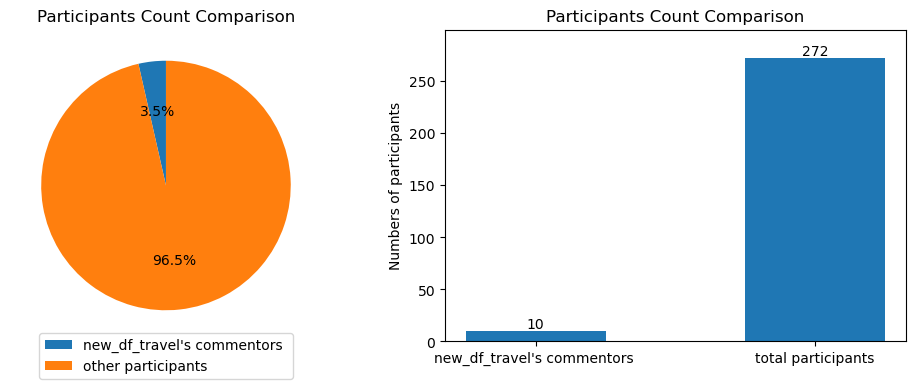

In [85]:
plot_observation_count(new_df_travel, df_1, "new_df_travel's commentors ")


In [86]:
new_df_identity = new_df[new_df['Recommendations'].str.contains('identity|Character|Distinctiveness|Unique', case=False)]
#new_df_identity 


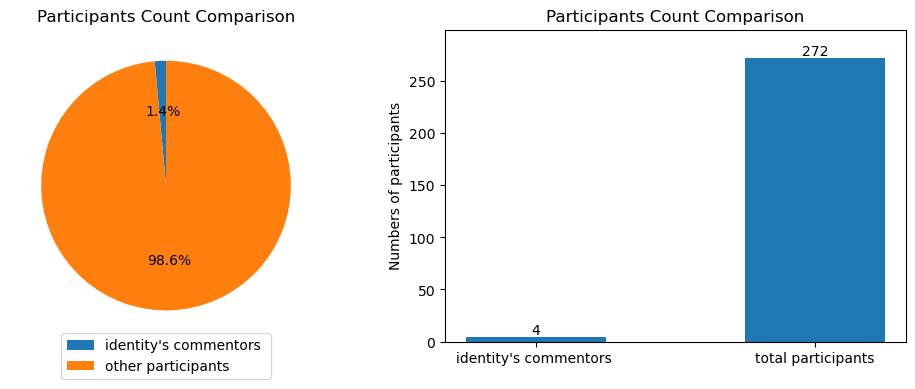

In [87]:
plot_observation_count(new_df_identity, df_1, "identity's commentors ")


In [88]:
new_df_offer = new_df[new_df['Recommendations'].str.contains('offer|Community|Services|Benefits|Support', case=False)]
#new_df_offer


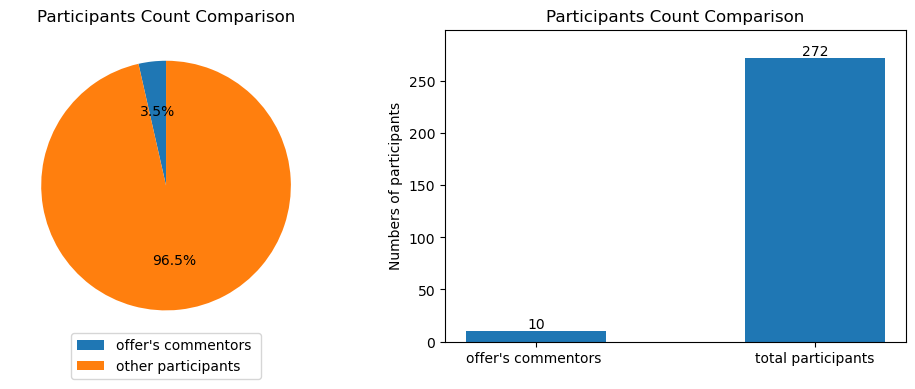

In [89]:
plot_observation_count(new_df_offer, df_1, "offer's commentors ")


In [90]:
new_df_connectivity = new_df[new_df['Recommendations'].str.contains('Network|Interconnectivity|Integration|Linkage|connectivity|connection|mobile', case=False)]
#new_df_connectivity


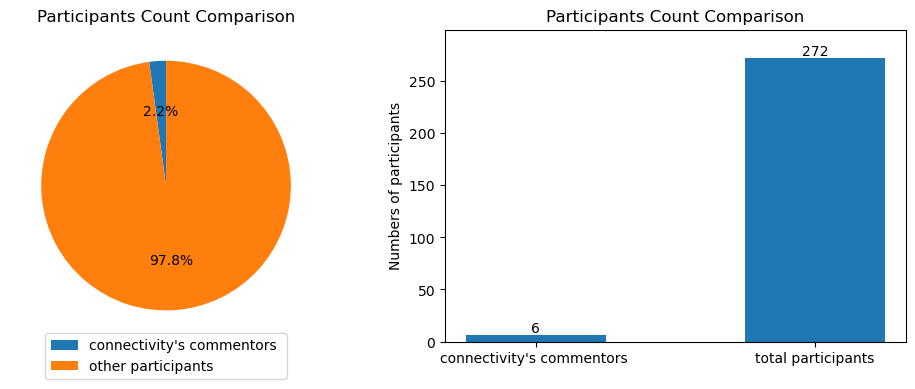

In [91]:
plot_observation_count(new_df_connectivity, df_1, "connectivity's commentors ")


## Below is a function which save all dataframe of topics to excel file, 1 topic is in 1 sheet

In [58]:
# Create an Excel writer object
writer = pd.ExcelWriter('dataframes.xlsx') # you can change the name of Excel file 

# Dictionary of dataframes with sheet names
dataframes = {
# "red words" is names of sheet, black words is dataframe (content of sheets)
    'new_df_building_design': new_df_building_design,
    'new_df_heritage_culture': new_df_heritage_culture,
    'new_df_demolition': new_df_demolition,
    'new_df_library': new_df_library,
    'new_df_outdoor': new_df_outdoor,
    'new_df_facilities_accessibility': new_df_facilities_accessibility,
    'new_df_identity': new_df_identity,
    'new_df_connectivity': new_df_connectivity,
    'new_df_offer': new_df_offer,
    'new_df_travel': new_df_travel,
    'new_df_safety_maintenance': new_df_safety_maintenance,
    'new_df_parking': new_df_parking,
    'new_df_art_gallery': new_df_art_gallery,
    'new_df_museum': new_df_museum,
    'new_df_food_hall': new_df_food_hall
}

# Save each dataframe as a sheet in the Excel file
for sheet_name, df in dataframes.items():
    df.to_excel(writer, sheet_name=sheet_name, index=False)

# Save the Excel file
writer.save()


## The first bar chart is about comparison numbers of recommendations

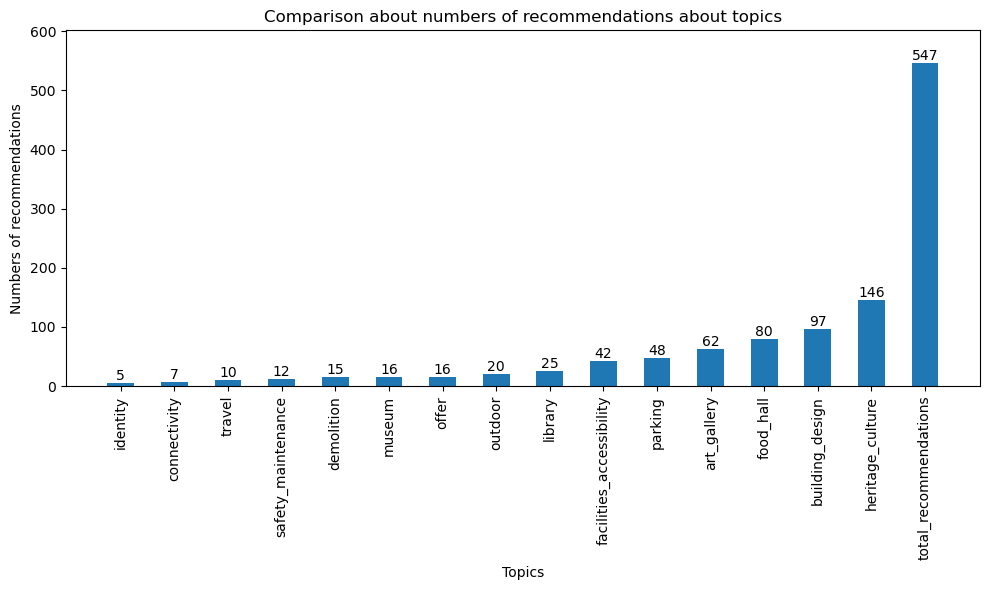

In [104]:
# Create a list of the dataframes
list_df_splited = [new_df_building_design, new_df_heritage_culture, new_df_demolition, new_df_library, new_df_outdoor, new_df_facilities_accessibility, new_df_identity, new_df_connectivity, new_df_offer, new_df_travel, new_df_safety_maintenance, new_df_parking, new_df_art_gallery, new_df_museum, new_df_food_hall, new_df]# Create a list of names for each dataframe
# Create a list of names for each dataframe
name_df_splited = ['building_design','heritage_culture','demolition','library','outdoor','facilities_accessibility','identity','connectivity','offer','travel','safety_maintenance','parking','art_gallery','museum','food_hall', 'total_recommendations']


# Call the function to plot the numbers of recommendations
plot_lengths_comments(list_df_splited, name_df_splited)


## The second bar chart is about comparison numbers of surveyor

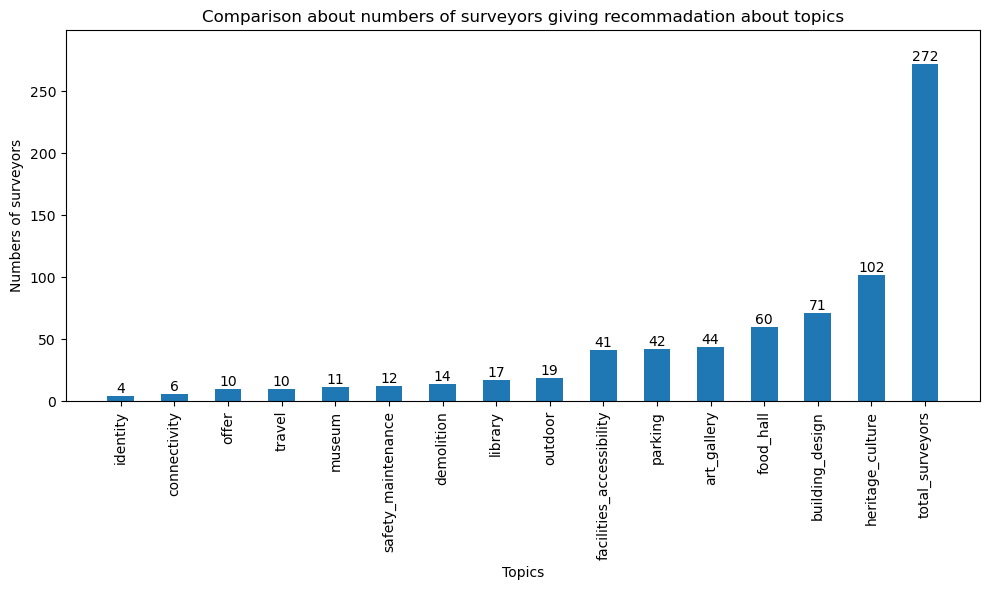

In [105]:
# Create a list of the dataframes
list_df = [new_df_building_design, new_df_heritage_culture, new_df_demolition, new_df_library, new_df_outdoor, new_df_facilities_accessibility, new_df_identity, new_df_connectivity, new_df_offer, new_df_travel, new_df_safety_maintenance, new_df_parking, new_df_art_gallery, new_df_museum, new_df_food_hall, df_1]
# Create a list of names for each dataframe
name_df = ['building_design','heritage_culture','demolition','library','outdoor','facilities_accessibility','identity','connectivity','offer','travel','safety_maintenance','parking','art_gallery','museum','food_hall', 'total_surveyors']


# Call the function to plot the numbers of surveyors
plot_numbers_surveyors(list_df, name_df)
